### Outline 

##### The data analysis in this notebook contains the following points:

- A first Exploratory Data Analysis that helps with better understanding the data, maybe ask some interesting questions and go from data to answers. 


- The Cohort Analysis that aims to group the users by presence and show how their behavior evolves in time. This part is strumental to the next point.


- The Model: a linear regression model that takes the data prepared previously and computes a first prediction.


- Summary and conclusions where I address each of the questions in the assignment and try to give answers and recommendations on each one.



### 1- Explorative Data Analysis

- This part helps with understanding data, data types, checking if there are missing values, and in general undestanding the dimentionality of data. 



- This analysis helps also understand the data from a statistical point a view, through simple descriptive statistics graphics such as histograms and barcharts.

In [1]:
# Loading the neccessary packages for analyzing and visualizing the data
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# loading the dataset
test_data = pd.read_csv("technical_test_data.csv")

In [3]:
# check the first 5 rows to inspect them visually
test_data.head()

,user_id,days_from_install,platform,device_type,os_version,day_of_week_install,iap_revenue,ad_revenue,num_transactions,num_sessions,time_played,end_level
0,3348781726084220417,0,ios,iphone,12.2,6,0.0,0.000000,0,5,3100,6.0
1,3348797457978470891,0,android,unknown,5.1.1,6,0.0,0.000000,0,1,591,1.0
2,3348787236889158018,0,android,unknown,6.0,6,0.0,0.000000,0,2,1495,6.0
3,3348786098467806796,0,android,unknown,9,6,0.0,0.000000,0,5,1323,6.0
4,3348703653570660243,0,android,unknown,8.1.0,6,0.0,0.000062,0,1,0,1.0


In [4]:
# check for missing values in the dataframe -  end_level column contains NaNs 
print(test_data.isna().sum())
print(test_data.isna().any().any())

user_id                   0
days_from_install         0
platform                  0
device_type               0
os_version                0
day_of_week_install       0
iap_revenue               0
ad_revenue                0
num_transactions          0
num_sessions              0
time_played               0
end_level              2375
dtype: int64
True


In [5]:
# have a quick statistical summary on the distribution of each column values
print(test_data.describe())

            user_id  days_from_install  day_of_week_install    iap_revenue  \
count  7.496920e+05      749692.000000        749692.000000  749692.000000   
mean   3.346561e+18          18.155294             2.857954       0.000259   
std    1.273896e+17          17.097323             2.086406       0.005173   
min    5.194436e+08           0.000000             0.000000       0.000000   
25%    3.350656e+18           3.000000             1.000000       0.000000   
50%    3.352393e+18          13.000000             3.000000       0.000000   
75%    3.354604e+18          30.000000             5.000000       0.000000   
max    3.375004e+18          60.000000             6.000000       1.000000   

          ad_revenue  num_transactions   num_sessions    time_played  \
count  749692.000000     749692.000000  749692.000000  749692.000000   
mean        0.000084          0.028101       3.382340    1521.650242   
std         0.001051          0.425248      15.844106    2139.166966   
min      

In [6]:
# check the data type of each column
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749692 entries, 0 to 749691
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              749692 non-null  int64  
 1   days_from_install    749692 non-null  int64  
 2   platform             749692 non-null  object 
 3   device_type          749692 non-null  object 
 4   os_version           749692 non-null  object 
 5   day_of_week_install  749692 non-null  int64  
 6   iap_revenue          749692 non-null  float64
 7   ad_revenue           749692 non-null  float64
 8   num_transactions     749692 non-null  int64  
 9   num_sessions         749692 non-null  int64  
 10  time_played          749692 non-null  int64  
 11  end_level            747317 non-null  float64
dtypes: float64(3), int64(6), object(3)
memory usage: 68.6+ MB


#### Plotting graphics and distributions 

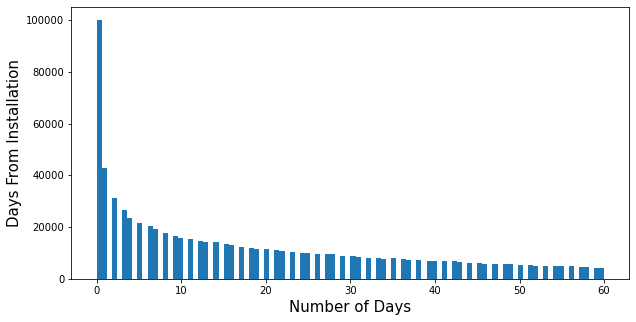

In [7]:
# plot the distribution of the days_from_install variable
plt.figure(figsize= (10, 5))
plt.hist(test_data['days_from_install'], bins = 100)
plt.xlabel('Number of Days', size = 15)
plt.ylabel('Days From Installation', size = 15)
plt.show()

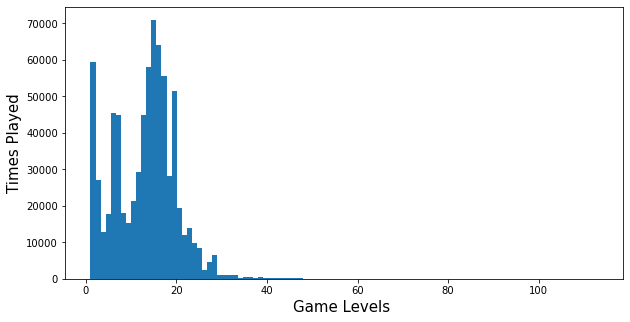

In [8]:
# replace nan-s in end_level column
test_data['end_level'] = test_data['end_level'].fillna(test_data['end_level'].mean())

# plot the distribution of the game levels reached in each session
plt.figure(figsize= (10, 5))
plt.hist(test_data['end_level'], bins = 100)

plt.xlabel('Game Levels ', size = 15)
plt.ylabel('Times Played', size = 15 )
plt.show()

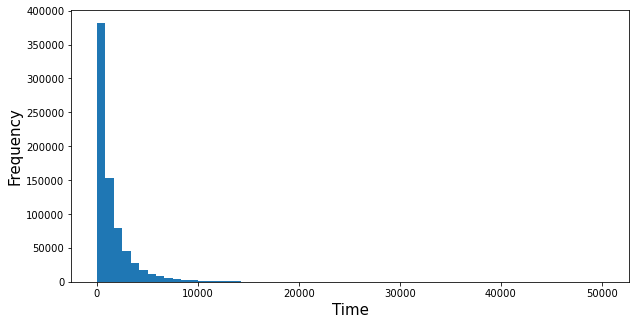

In [9]:
# plot the distribution of the time played each day 
plt.figure(figsize= (10, 5))
plt.hist(test_data['time_played'], bins = 60)
plt.xlabel('Time', size = 15)
plt.ylabel('Frequency', size = 15)
plt.show()

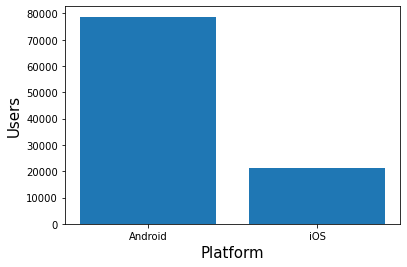

In [10]:
# plot the number of devices belonging to each platform (Android and iOS. )
t = test_data.groupby('platform')['user_id'].nunique()
plt.bar(['Android', 'iOS'], t, align='center')
plt.xlabel("Platform", size = 15)
plt.ylabel("Users", size = 15)
plt.show()

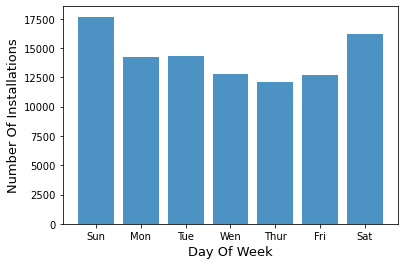

In [11]:
# the distribution of day_of_week_install 
dow = test_data.groupby('day_of_week_install')['user_id'].nunique()
plt.bar(['Sun', 'Mon', 'Tue', 'Wen', 'Thur', 'Fri', 'Sat'], dow, align='center', alpha=0.8)
plt.xlabel("Day Of Week", size = 13)
plt.ylabel("Number Of Installations", size = 13)
plt.show()

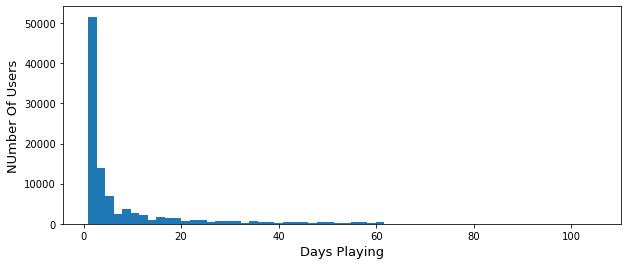

In [12]:
### the distribution of the frequency with which users has been playing during the 60 days period 
group_users_by_id_count = test_data.groupby('user_id')['user_id'].value_counts()

plt.figure(figsize = (10, 4))
plt.hist(group_users_by_id_count, bins = 60)  
plt.xlabel("Days Playing", size = 13)
plt.ylabel("NUmber Of Users", size = 13)
plt.show()

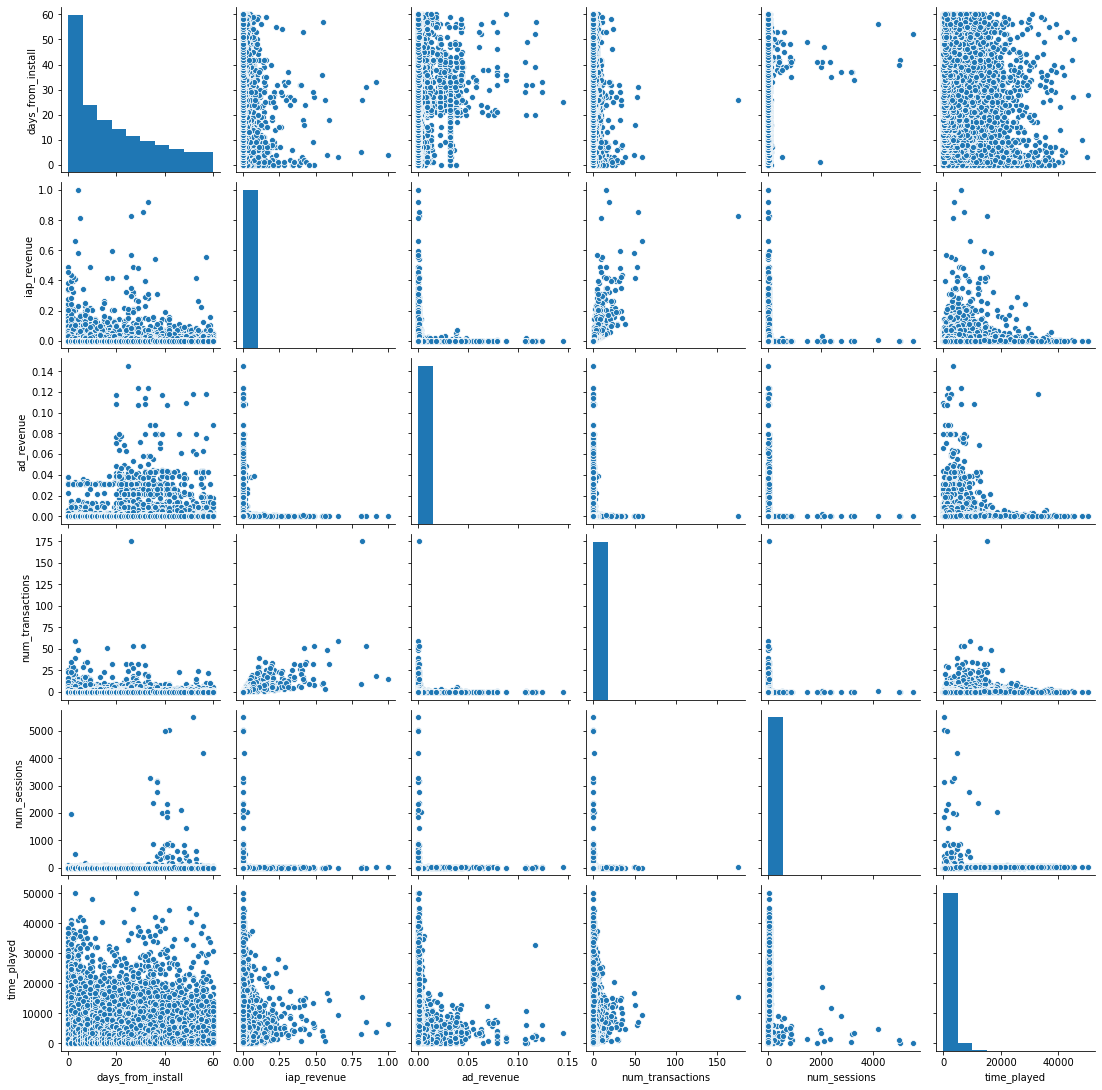

In [13]:
# spotting relationships between variables that might have a linear relationship
columns = ['days_from_install', 'iap_revenue', 'ad_revenue', 'num_transactions',
           'num_sessions', 'time_played']
pairplot_data = test_data[columns]
sns.pairplot(pairplot_data)

### 2 - Cohort Analysis 

- The descriptive analytics part will continue with a cohort analysis. The aim here is to groups the customers into mutually exclusive cohorts that are measured over time. In this case the time intevals are given by **days_from_install variable** 


- This type of analysis helps with understanding trends better by providing insights and metrics about the customer lifecycle.

In [28]:
# compute the distribution of ad_revenue/iap_revenue (value) during the 60 days period 
def get_distribution(df, col1, col2, col3):
    pivoted = pd.pivot_table(test_data, index = col1, values = col2, 
                                    columns = col3, 
                                     fill_value = 0)
    value = []
 
    for i in pivoted.columns: 
        value.append(pivoted[i].sum())
        
    return value  

# visualize it as a barchart 
def viz_bar(labx, laby, data):
    plt.figure(figsize = (10, 4))
    plt.bar(range(0, 61), data)  
    plt.xlabel(labx, size = 13)
    plt.ylabel(laby, size = 13)
    plt.show()
    
# visualize it as a histogram     
def viz_hist(labx, laby, data):
    plt.figure(figsize = (10, 4))
    plt.hist(data, bins = 30)  
    plt.xlabel(labx, size = 13)
    plt.ylabel(laby, size = 13)
    plt.show()    

In [29]:
ad_value = get_distribution(test_data, 'user_id', 'ad_revenue', 'days_from_install')
iap_value = get_distribution(test_data, 'user_id', 'iap_revenue', 'days_from_install')

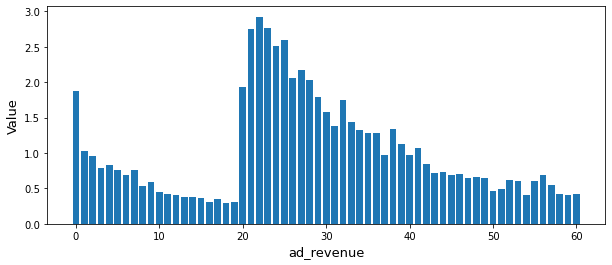

In [30]:
# plot the distribution of ad_revenue 
viz_bar('ad_revenue', 'Value', ad_value)

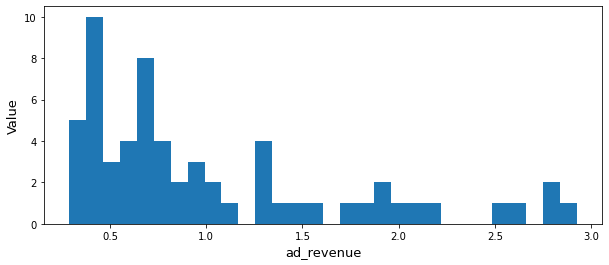

In [31]:
# plot the distribution of ad_revenue 
viz_hist('ad_revenue', 'Value', ad_value)

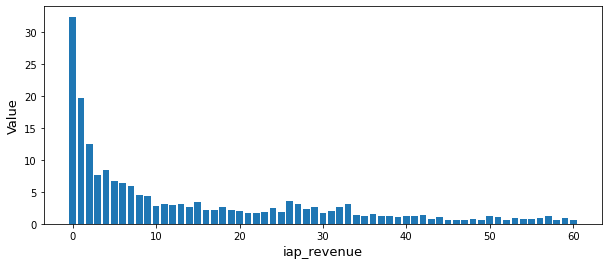

In [32]:
# plot the distribution of ad_revenue 
viz_bar('iap_revenue', 'Value', iap_value)

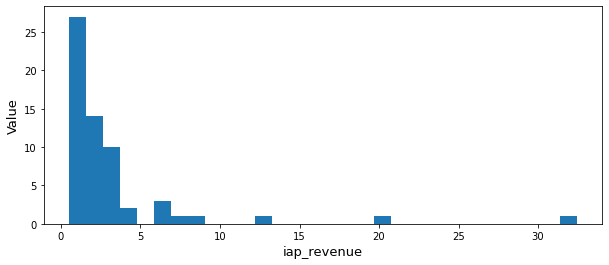

In [33]:
# plot the distribution of ad_revenue 
viz_hist('iap_revenue', 'Value', iap_value)

#### 2.1 - Counting users in each cohort

In [34]:
# building a pivot table that represents the cohorts 
test_data['CohortIndex'] = abs(59 - test_data['days_from_install']) + 1

group = test_data.groupby('user_id')['CohortIndex']
test_data['CohortIndex']= group.transform('min')

gruping = test_data.groupby(['days_from_install', 'CohortIndex'])
cohort_data = gruping['user_id'].apply(pd.Series.nunique)

In [35]:
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='days_from_install',
                                  columns = 'CohortIndex', # days_from_install
                                  values = 'user_id'
                                  )

In [36]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
days_from_install,,,,,,,,,,,,,,,,,,,,,
0,4307.0,2678.0,1023.0,1048.0,927.0,758.0,719.0,678.0,663.0,651.0,...,1123.0,1236.0,1450.0,1598.0,1682.0,2033.0,2601.0,3684.0,7248.0,37084.0
1,3437.0,1930.0,722.0,722.0,630.0,531.0,477.0,469.0,446.0,424.0,...,672.0,739.0,824.0,933.0,959.0,1139.0,1501.0,2124.0,7249.0,NaN
2,3190.0,1676.0,610.0,609.0,537.0,442.0,417.0,382.0,389.0,358.0,...,534.0,601.0,640.0,694.0,751.0,888.0,1177.0,3684.0,NaN,NaN
3,3083.0,1569.0,536.0,553.0,500.0,400.0,361.0,353.0,359.0,317.0,...,452.0,508.0,549.0,615.0,664.0,815.0,2601.0,NaN,NaN,NaN
4,3007.0,1470.0,498.0,517.0,468.0,371.0,345.0,308.0,334.0,298.0,...,416.0,462.0,507.0,520.0,622.0,2033.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2650.0,873.0,297.0,1048.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,2723.0,880.0,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,2752.0,1647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# compute the number of users that have been playing for each cohort 
sum_per_row = cohort_counts.sum(axis = 1)
sum_per_row

days_from_install
0     99990.0
1     42705.0
2     31268.0
3     26494.0
4     23391.0
       ...   
56     4868.0
57     4626.0
58     4399.0
59     4307.0
60     4152.0
Length: 61, dtype: float64

In [38]:
sum_per_row.pct_change()[1:]

days_from_install
1    -0.572907
2    -0.267814
3    -0.152680
4    -0.117121
5    -0.080202
6    -0.050476
7    -0.051789
8    -0.080378
9    -0.070170
10   -0.049143
11   -0.028635
12   -0.037323
13   -0.025869
14   -0.009688
15   -0.052083
16   -0.038090
17   -0.038595
18   -0.037896
19   -0.037303
20   -0.017944
21   -0.012711
22   -0.033527
23   -0.035708
24   -0.033193
25   -0.020738
26   -0.025028
27   -0.011536
28   -0.009358
29   -0.051157
30   -0.031432
31   -0.021365
32   -0.035520
33   -0.033525
34   -0.008482
35    0.002426
36   -0.046364
37   -0.030453
38   -0.015567
39   -0.032746
40   -0.025897
41    0.010991
42   -0.012046
43   -0.043866
44   -0.052566
45   -0.010506
46   -0.033510
47   -0.037933
48    0.005531
49   -0.010114
50   -0.040868
51   -0.028967
52   -0.023480
53   -0.036066
54   -0.019832
55    0.006675
56    0.008703
57   -0.049712
58   -0.049070
59   -0.020914
60   -0.035988
dtype: float64

##### 2. 1- Retention rates

In [39]:
#  Count the number of unique values per customer ID
cohort_data_ret = gruping['user_id'].apply(pd.Series.nunique).reset_index()

In [40]:
# Create a pivot 
cohort_counts_ret = cohort_data_ret.pivot(index='days_from_install', 
                                          columns='CohortIndex', # days_from_install
                                          values='user_id')

In [41]:
# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts_ret.iloc[:,0]

In [42]:
# Divide the cohort count by cohort sizes along the rows and round the result at second decimal
retention = round(cohort_counts.divide(cohort_sizes, axis=0) * 100, 2)

In [43]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
days_from_install,,,,,,,,,,,,,,,,,,,,,
0,100.0,62.18,23.75,24.33,21.52,17.60,16.69,15.74,15.39,15.11,...,26.07,28.70,33.67,37.10,39.05,47.20,60.39,85.54,168.28,861.02
1,100.0,56.15,21.01,21.01,18.33,15.45,13.88,13.65,12.98,12.34,...,19.55,21.50,23.97,27.15,27.90,33.14,43.67,61.80,210.91,NaN
2,100.0,52.54,19.12,19.09,16.83,13.86,13.07,11.97,12.19,11.22,...,16.74,18.84,20.06,21.76,23.54,27.84,36.90,115.49,NaN,NaN
3,100.0,50.89,17.39,17.94,16.22,12.97,11.71,11.45,11.64,10.28,...,14.66,16.48,17.81,19.95,21.54,26.44,84.37,NaN,NaN,NaN
4,100.0,48.89,16.56,17.19,15.56,12.34,11.47,10.24,11.11,9.91,...,13.83,15.36,16.86,17.29,20.69,67.61,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,100.0,32.94,11.21,39.55,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,100.0,32.32,37.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,100.0,59.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


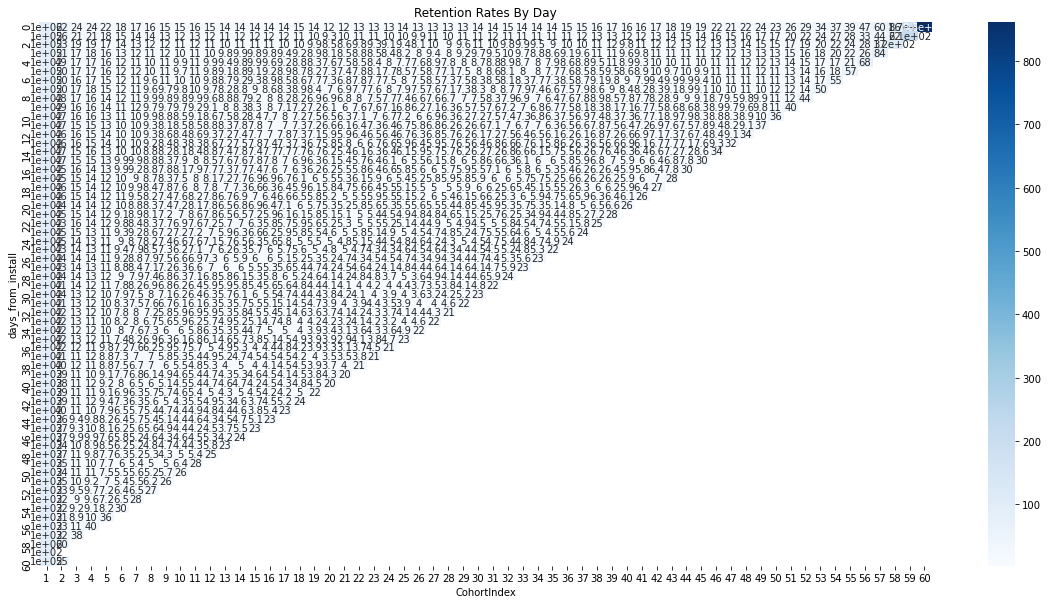

In [44]:
# Plot the retention rates as a heatmap
# Initialize an 20 by 10 plot 
plt.figure(figsize=(20, 10))

# Add a title
plt.title('Retention Rates By Day')

# Create the heatmap
sns.heatmap(retention, annot=True, cmap='Blues')
plt.show()

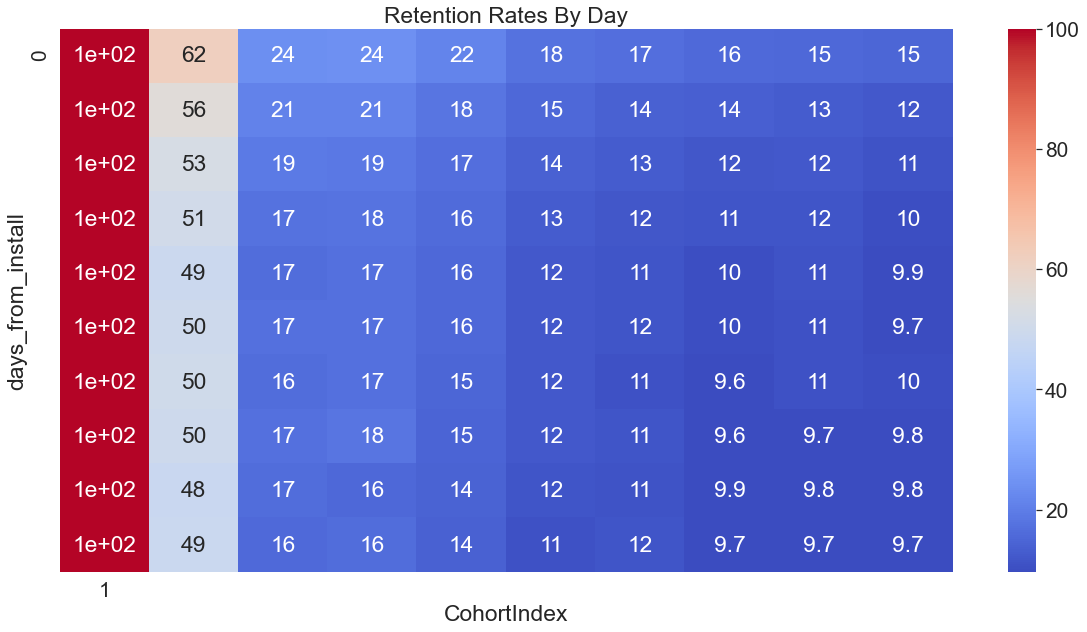

In [45]:
# ploting a small proportion of the pivot table given that the viz. above is not readable
subset_retention = retention.iloc[:10, :10]
plt.figure(figsize=(20, 10))

# set font size 
sns.set(font_scale=1.9)

# Add a title
plt.title('Retention Rates By Day')

# Create the heatmap
sns.heatmap(subset_retention, annot=True, cmap="coolwarm", xticklabels=30, yticklabels=30)
plt.show()

###### 2.2 - Some stats that will turn useful later on.
- The reason for this stats is to identify the customers that create more value for the business by being loyal customers, i.e making transations/ in-app-purchases and watching ads. 

In [46]:
# compute number of users that have been watching ads
num_of_users_watching_ads = test_data[test_data['ad_revenue'] > 0]['user_id'].nunique()
print('Number of users generating revenue by watching ads ', num_of_users_watching_ads)

# compute the number of users that have generated revenue by in-app-transations
num_of_buying_users = test_data[test_data['iap_revenue'] > 0]['user_id'].nunique()
print('Number of users making at least one in app transaction ', num_of_buying_users)

Number of users generating revenue by watching ads  41011
Number of users making at least one in app transaction  5240


In [47]:
# generate a pivot table that aggregates on ad_revenue 
pivoted_ad_data = pd.pivot_table(test_data, index = 'user_id', values = 'ad_revenue', 
                                    columns = 'days_from_install', 
                                     fill_value = 0)

In [48]:
# generate a pivot table that aggregates on iap_revenue 
pivoted_iap_data = pd.pivot_table(test_data, index = 'user_id', values = 'iap_revenue', 
                                    columns = 'days_from_install', 
                                     fill_value = 0)

In [49]:
# compute cumulated value for ad and iap_revenue
cumulated_ad = pivoted_ad_data.cumsum(axis = 1)
cumulated_iap = pivoted_iap_data.cumsum(axis = 1)

In [50]:
# compute LTV_DX where X = 60
total_rev_ad = cumulated_ad[60].sum()
total_rev_iap = cumulated_iap[60].sum()

print("Total revenue from ads ", total_rev_ad)
print("Total revenue from in app purchase", total_rev_iap)

Total revenue from ads  62.86514360561655
Total revenue from in app purchase 193.9050365202518


In [51]:
# compute average revenue and print the result (only for paying or watching ads users )
avg_ad_revenue_per_user_60d = total_rev_ad / num_of_users_watching_ads
avg_iap_revenue_per_user_60d = total_rev_iap / num_of_buying_users

print('Average ad revenue per user watching ads $', avg_ad_revenue_per_user_60d)
print('Average iap revenue per paying user (normalized) $ ', avg_iap_revenue_per_user_60d)

Average ad revenue per user watching ads $ 0.0015328849236940468
Average iap revenue per paying user (normalized) $  0.03700477796188011


In [52]:
# compute average revenue for the total of users
print('Average ad revenue for the total of users $', total_rev_ad / 100000)
print('Average iap revenue for the total of users (normalized) $ ', total_rev_iap / 100000)

Average ad revenue for the total of users $ 0.0006286514360561655
Average iap revenue for the total of users (normalized) $  0.001939050365202518


### 3 -  The Model - Linear regression for estimating the LTV in the next days/ months. 

- This section of analysis presents a linear regression model that will make predictions about the Average LTV. 



- Though I am aware of the existence of more soffisticated methods for predicting LTV like Beta Geometric/Negative Binomial Distribution or Pareto/NDB, I prefer linear regression for its simplicity and interpretability.


##### 3.1 - Preparing the data for the model

In [53]:
# Create a new column containing the sum of iap_revenue and ad_revenue to be used in building the pivot table
test_data['LTV_DX'] = test_data['iap_revenue'] + test_data['ad_revenue']

In [54]:
# pivot table for computing the LTV_DX of a user 
pivoted_target = pd.pivot_table(test_data, index = ['user_id'],
               values = 'LTV_DX',
               columns = ['CohortIndex'], 
               aggfunc = 'sum', fill_value = 0)

In [55]:
pivoted_target

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
user_id,,,,,,,,,,,,,,,,,,,,,
519443644,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000076,0.0,0.0
701396647,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
703492209,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000113,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1073487166,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1108856816,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360043075640561757,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3360103322355714973,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3360792502470119550,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [56]:
# compute the cumulated sum for the target 
cs_pivoted_target = pivoted_target.cumsum(axis = 1)

In [57]:
# create the features X based on time granularity from 1 to 60. In this case I consider time granularity = 2 days.
time_granularity = 2
X_data = {}

for i in range(1, 55, time_granularity): 
    print(i)
    X_data[i]=pivoted_target[i]

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53


In [58]:
X = pd.DataFrame(X_data)
X = X.reset_index().drop(['user_id'], axis = 1).values

In [59]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00011327],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00723105, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [60]:
# create the target 
y = cs_pivoted_target[60].values

##### 3.2 Building the model 

In [61]:
# import sklean train_test_split method
from sklearn.model_selection import train_test_split

# split the data in training and testing set
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.25,random_state=0)

# Print shapes of the datasets
print(train_X.shape, train_y.shape,  test_X.shape, test_y.shape)

(74994, 27) (74994,) (24998, 27) (24998,)


In [62]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)

yhat = lin_reg.predict(test_X)

In [63]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test_y, yhat))
mae = mean_absolute_error(test_y, yhat)

In [64]:
print(rmse)
print(mae)

0.018831256071314688
0.0018842622760042859


##### 3.3 - Statistical significance of the model. 
- interpreting the coeficients 


In [65]:
import statsmodels.api as sm

In [66]:
olsreg = sm.OLS(train_y, train_X )

In [67]:
model = olsreg.fit()

In [68]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.548
Model:                            OLS   Adj. R-squared (uncentered):              0.548
Method:                 Least Squares   F-statistic:                              3365.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):                        0.00
Time:                        23:02:09   Log-Likelihood:                      1.9091e+05
No. Observations:               74994   AIC:                                 -3.818e+05
Df Residuals:                   74967   BIC:                                 -3.815e+05
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### 4 - The summary 

The assignement requires to develop a predictive model to estimate the LTV in order to answer the
following questions:

- 1. Considering that the marketing campaign costs equal to 400 dollars , will the campaign be profitable after one year? By profitable here we mean that the revenue made by the users brought by this campaign, i.e. (LTV D365) * (Number of Users), will exceed the total campaign cost, i.e. 400 dollars.


- 2. Assuming that the campaign will not be profitable after one year: Will the campaign ever be profitable?

    - If yes, how much time will it pass until the campaign becomes profitable?
    - Regardless of the profitability of the campaign, how much money will the campaign generate?


- 3. Given the obtained results, what would you recommend regarding this type ofinvestment? Which confidence can you provide on your
  recommendation? Which isthe maximum amount that would you recommend to pay for every new game user?

##### Question 1 : Considering that the marketing campaign costs equal to 400 dollars , will the campaign be profitable after one year?

-  The answer to this question depends a lot on the retention rate. For example, if the retention rate is near to zero then the subscribes that have been acquired during the campaign will continue to generate revenue (through ads or in app purchases). 

- By computing the retention rate as a percentage change of the first column in the pivot table that counts the number of users in each slot, it is possibile to give an estimate. 

In [69]:
sum_per_row = cohort_counts.sum(axis = 1)
num_users_decay = sum_per_row.pct_change()[1:]

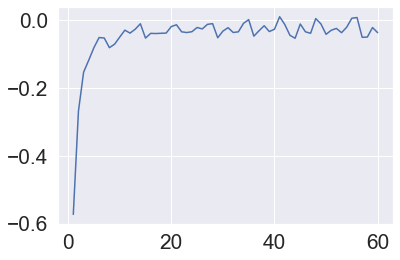

In [70]:
plt.plot(num_users_decay)
plt.show()

- the number of users leaving the company will eventually converge to zero as the graphics above shows

- at the end of the 60 days period there are still 4152 users which seem to be loyal customers.

In [71]:
sum_per_row[60]

4152.0

##### Question 2 : Assuming that the campaign will not be profitable after one year: Will the campaign ever be profitable?

- if the campaign will be profitable this depends on the churn rate and the customer lifespan. If the customer lifespan goes from two to three years and the churn rate remains close to zero then the capmaign will become profitable.

##### Question 3 : Given the obtained results, what would you recommend regarding this type of investment? 

- From what I learned from the data I would recomend that this type of investiment is profitable. 


- Which confidence can you provide on your recommendation?  The confidence is provided by the p-value in the regression model that I presented and it is close to 99%


- Which is the maximum amount that would you recommend to pay for every new game user? I was not able to compute this number!
